In [19]:
import sys, os
sys.path.append('..')

from dataset import load_data
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import utils
from utils import eval_model, visualize_model, train_model
import models
import torchvision.models as models
import train as t
import const

print(torch.cuda.get_device_name(0))

%load_ext autoreload
%autoreload 2

use_gpu = torch.cuda.is_available()
if use_gpu:
    device = torch.device('cuda')
    print ("using CUDA")
else:
    device = torch.device('cpu')
    
print(use_gpu)

Tesla K80
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
using CUDA
True


In [2]:
train_data, val_data, test_data = load_data()

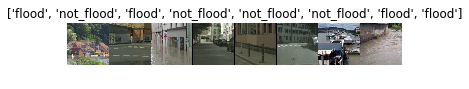

In [3]:
inputs, classes = next(iter(train_data))
utils.show_databatch(inputs, classes)

In [4]:
# load in vgg16 model
if 'heidi' in os.getcwd():
    vgg16 = models.vgg16()
    vgg16.load_state_dict(torch.load("C:/Users/heidi/.torch/models/vgg16-397923af.pth"))
else:
    vgg16 = models.vgg16(pretrained=True)
    
print(vgg16.classifier[6].out_features) # 1000 


# Freeze training for all layers
for param in vgg16.features.parameters():
    param.require_grad = False

# Newly created modules have require_grad=True by default
num_features = vgg16.classifier[6].in_features
features = list(vgg16.classifier.children())[:-1] # Remove last layer
features.extend([nn.Linear(num_features, len(classes))]) # Add our layer with 4 outputs
vgg16.classifier = nn.Sequential(*features) # Replace the model classifier
print(vgg16)

1000
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): C

In [5]:
if use_gpu:
    vgg16.cuda() #.cuda() will move everything to the GPU side
    
criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.Adam(vgg16.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [6]:
print("Test before training")
eval_model(vgg16, test_data, criterion)

Test before training
Evaluating model
----------
Test batch 200/218
Evaluation completed in 1m 57s
Avg loss (test): 0.2580
Avg acc (test): 0.2084
----------


Ground truth:


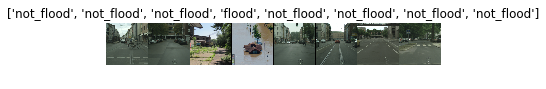

Prediction:


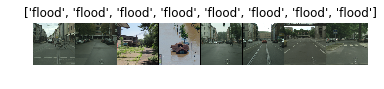

In [7]:
visualize_model(vgg16, test_data) 

In [22]:
vgg16_trained = train_model(train_data, val_data, vgg16, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=2)
print (vgg16_trained)
torch.save(vgg16.state_dict(), 'itried.pt')

654
Epoch 0/2
----------


Exception ignored in: <function _DataLoaderIter.__del__ at 0x7f1eada13268>
Exception ignored in: <function _DataLoaderIter.__del__ at 0x7f1eada13268>
Exception ignored in: <function _DataLoaderIter.__del__ at 0x7f1eada13268>
Exception ignored in: <function _DataLoaderIter.__del__ at 0x7f1eada13268>
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 677, in __del__
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 677, in __del__
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 677, in __del__
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 677, in __del__
    self._shutdown_workers()
    self._shutdown_workers()
    self._shutdown_workers()
    self._shutdown_workers()
  File "/opt/anaconda3/l

  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 659, in _shutdown_workers
    w.join()
    w.join()
    w.join()
    w.join()
  File "/opt/anaconda3/lib/python3.7/multiprocessing/process.py", line 138, in join
  File "/opt/anaconda3/lib/python3.7/multiprocessing/process.py", line 138, in join
  File "/opt/anaconda3/lib/python3.7/multiprocessing/process.py", line 138, in join
  File "/opt/anaconda3/lib/python3.7/multiprocessing/process.py", line 138, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
    assert self._parent_pid == os.getpid(), 'can only join a child process'
    assert self._parent_pid == os.getpid(), 'can only join a child process'
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
AssertionError: can only join a child process
AssertionError: can only join a child process
AssertionError: can only join a child process


torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
0
Training batch 0/327.0torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
1
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([

torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
35
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
36
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
37
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
38
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
39
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224

torch.Size([3, 224, 224])
74
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
75
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
76
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
77
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
78
torch.Size([3, 224, 224])
torch.Size([3, 224, 224

RuntimeError: Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/_utils/worker.py", line 99, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/_utils/collate.py", line 68, in default_collate
    return [default_collate(samples) for samples in transposed]
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/_utils/collate.py", line 68, in <listcomp>
    return [default_collate(samples) for samples in transposed]
  File "/opt/anaconda3/lib/python3.7/site-packages/torch/utils/data/_utils/collate.py", line 43, in default_collate
    return torch.stack(batch, 0, out=out)
RuntimeError: invalid argument 0: Sizes of tensors must match except in dimension 0. Got 3 and 4 in dimension 1 at /opt/conda/conda-bld/pytorch_1556653114079/work/aten/src/TH/generic/THTensor.cpp:711


torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([3, 224, 224])
torch.Size([

In [14]:
eval_model(vgg16_trained, criterion)

Evaluating model
----------
Test batch 0/47

C:\Users\heidi\Anaconda2\envs\py3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number



Evaluation completed in 0m 13s
Avg loss (test): 0.0459
Avg acc (test): 0.8221
----------


Ground truth:


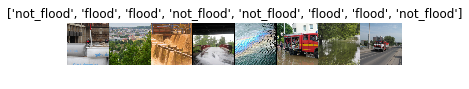

Prediction:


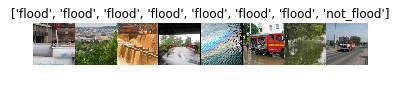

In [15]:
visualize_model(vgg16_trained)

In [31]:
#??
#load pre-trained flooding weights from dataset
pkl_filename = "../features/VGG16_relu5_3.pickle"  
last_layer_weights = {} # pretrained_weights is an empty dict already

if os.path.getsize(pkl_filename) > 0:      
    with open(pkl_filename, "rb") as f:
        unpickler = pickle.Unpickler(f)
        # if file is not empty scores will be equal
        # to the value unpickled
        last_layer_weights = unpickler.load()
        
print (last_layer_weights['pollution_1'].shape)